In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from echolens import simulation

In [3]:
cmbmap = simulation.CMBlensed()
noisemap = simulation.GaussianNoiseMap()

In [4]:
alms_signal = cmbmap.get_lensed_alms(0)


alm2lenmap: using 8 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:02.091540] (37.6%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.061884] (1.1%)  
  build_angles                         :  [0:00:02.153451] (38.7%)  
  synthesis general (STANDARD)         :  [0:00:00.817417] (14.7%)  
  gclm2lenmap                          :  [0:00:05.534196] (99.5%)  
  synthesis general (GRAD_ONLY)        :  [0:00:02.547180] (45.8%)  
  polrot (ducc)                        :  [0:00:00.016124] (0.3%)  
  Total                                :  [0:00:05.563424] d:h:m:s:mus


In [5]:
alms_noise = noisemap.noise_alm_idx(0)

In [6]:
cmbspectra = simulation.CMBspectra()
noisespec = simulation.NoiseSpectra()

In [7]:
cl_len = cmbspectra.get_lensed_spectra(dl=False)
cl_nt = noisespec.noise_T()
cl_np = noisespec.noise_P()

In [8]:
tlm,elm,blm = alms_signal

In [9]:
which = 0
tlm_n,elm_n,blm_n = alms_noise

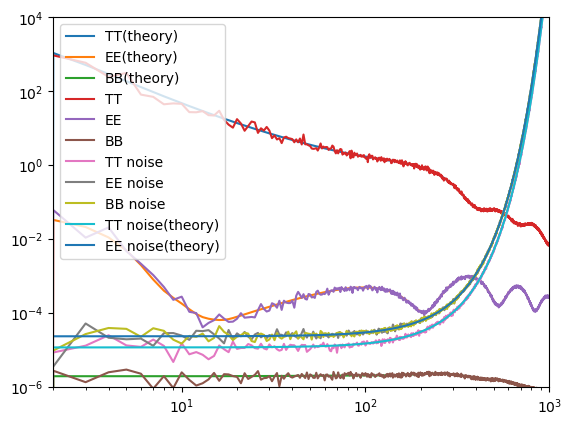

In [10]:
plt.loglog(cl_len['tt'], label='TT(theory)')
plt.loglog(cl_len['ee'], label='EE(theory)')
plt.loglog(cl_len['bb'], label='BB(theory)')
plt.loglog(hp.alm2cl(tlm), label='TT')
plt.loglog(hp.alm2cl(elm), label='EE')
plt.loglog(hp.alm2cl(blm), label='BB')
plt.loglog(hp.alm2cl(tlm_n), label='TT noise')
plt.loglog(hp.alm2cl(elm_n), label='EE noise')
plt.loglog(hp.alm2cl(blm_n), label='BB noise')
plt.loglog(cl_nt[which], label='TT noise(theory)')
plt.loglog(cl_np[which], label='EE noise(theory)')
plt.xlim(2, 1000)
plt.ylim(1e-6, 1e4)
plt.legend()